In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
sns.set(font_scale=2)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### RFID data

#### Get paths for files to process

In [2]:
#create list of dir paths
RFID_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly'
    
RFID_file_names = os.listdir(RFID_path)

RFID_data_dir_paths = []

for file in RFID_file_names:
    int_path = RFID_path + '/' + file
    RFID_data_dir_paths.append(int_path)
    
RFID_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.04.20.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/.DS_Store',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.09.29.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.05.04.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.07.18.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.07.27.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.05.26.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.05.18.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.09.19.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.07.08.csv',
 '

#### Clean df and fix datetime

In [3]:
path = RFID_data_dir_paths[10]

data_RFID_int = pd.read_csv(path, sep=';', encoding='utf-16')

data_RFID_int = pd.DataFrame(data = data_RFID_int)
print(data_RFID_int.shape)

data_RFID_int.head(50)

(150800, 14)


,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3
0,#ID-Device,Spyder1.01,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#ID-Device,Spyder1.02,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#ID-Device,Spyder1.03,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#ID-Device,Spyder1.04,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#ID-Device,Spyder1.05,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,#ID-Device,Spyder1.06,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,#ID-Device,Spyder1.07,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,#ID-Device,Spyder1.08,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,#ID-Device,Spyder1.09,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,#ID-Device,Spyder1.10,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
row_drop = 25

data_RFID = pd.DataFrame()

for path in RFID_data_dir_paths[10:11]:
    print(path)

    if path.split('/')[-1] == '.DS_Store':
        continue
    
    #data_RFID_int['file'] = path.split('/')[-1]
    
    #create data table
    data_RFID_int = pd.read_csv(path, sep=';', encoding='utf-16')
    data_RFID_int = pd.DataFrame(data = data_RFID_int)
    data_RFID_int = data_RFID_int.iloc[row_drop: , :]
    print(data_RFID_int.shape)
    
    #add file name
    data_RFID_int['RFID_file'] = path.split('/')[-1]
                                            
    #drop rows with no event duration
    data_RFID_int = data_RFID_int[~data_RFID_int['eventDuration'].isna()]
    print(data_RFID_int.shape)
    data_RFID_int = data_RFID_int[~data_RFID_int['DateTime'].isna()]
    print(data_RFID_int.shape)

    #convert from ms to sec
    data_RFID_int['eventDuration'] = data_RFID_int['eventDuration']/1000
    #clean up and create datetime columns
    data_RFID_int['start_datetime'] = pd.to_datetime(data_RFID_int['DateTime'], unit='d')
    #can't figure out datetime format so hard code for now
    data_RFID_int['RFID_datetime_start'] = [x.replace(year = 2022) - dt.timedelta(days = 1) for x in data_RFID_int['start_datetime']] 
    data_RFID_int['RFID_date'] = data_RFID_int['RFID_datetime_start'].dt.date 
    data_RFID_int['RFID_day'] = data_RFID_int['RFID_datetime_start'].dt.day 
    data_RFID_int['RFID_time_start'] = [x.split(' ')[1] for x in data_RFID_int['RFID_datetime_start'].dt.strftime("%Y-%m-%d %H:%M:%S")]
    data_RFID_int['RFID_hour'] = data_RFID_int['RFID_datetime_start'].dt.hour
    data_RFID_int['RFID_min'] = data_RFID_int['RFID_datetime_start'].dt.minute
    data_RFID_int['RFID_second'] = data_RFID_int['RFID_datetime_start'].dt.second

    if data_RFID.empty:
        data_RFID = data_RFID_int
    else:
        data_RFID = pd.concat([data_RFID, data_RFID_int], axis=0)
        
    print(data_RFID.shape,'\n')

#clean columns
data_RFID = data_RFID[['RFID_file', 'IdRFID', 'unitLabel', 'eventDuration',
       'RFID_datetime_start', 'RFID_date',
       'RFID_day', 'RFID_time_start', 'RFID_hour', 'RFID_min', 'RFID_second']]

print(data_RFID.shape,'\n')

data_RFID.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/RFID/poly/Idspyder-22.10.10.csv
(150775, 14)
(150774, 15)
(150774, 15)
(150774, 23) 

(150774, 11) 



,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second
25,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.457,2022-10-10 14:00:16.519046400,2022-10-10,10,14:00:16,14,0,16
26,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.075,2022-10-10 14:00:20.190960000,2022-10-10,10,14:00:20,14,0,20
27,Idspyder-22.10.10.csv,041A55583F,Spyder1.14,0.458,2022-10-10 14:00:21.414988800,2022-10-10,10,14:00:21,14,0,21
28,Idspyder-22.10.10.csv,041A55583F,Spyder1.15,1.030,2022-10-10 14:00:22.616985600,2022-10-10,10,14:00:22,14,0,22
29,Idspyder-22.10.10.csv,041A55583F,Spyder1.10,0.987,2022-10-10 14:00:25.018041600,2022-10-10,10,14:00:25,14,0,25


In [5]:
data_RFID['RFID_day'].value_counts()

16    21695
15    19869
18    18322
13    16185
14    15818
12    15105
17    13409
11    13020
10    10122
19    7229 
Name: RFID_day, dtype: int64

In [6]:
data_RFID['IdRFID'].value_counts()

041AC169DC    16813
041AC167B8    16466
041AC16B67    14495
041AC1610F    14245
041AC160C0    12039
041AC16317    10168
041AC165FE    9934 
041AC163A9    9636 
041AC16782    8570 
041AC1677D    8380 
041AC16486    7491 
041AC15ED3    6740 
041AC1646F    5894 
041AC1646E    5402 
041AC1617F    4278 
041AC03635    201  
041A55583F    22   
Name: IdRFID, dtype: int64

#### Compute endtime 

In [7]:
#compute end time for each eventDuration
def add_duration(a, b):
    newtime = a + dt.timedelta(0, b)

    return newtime

data_RFID['RFID_datetime_end'] = data_RFID.apply(lambda row: add_duration(row['RFID_datetime_start'], row['eventDuration']), axis=1)
data_RFID['RFID_time_end'] = [x.split(' ')[1] for x in data_RFID['RFID_datetime_end'].dt.strftime("%Y-%m-%d %H:%M:%S")]

print(data_RFID.shape)
data_RFID.head()

(150774, 13)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end
25,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.457,2022-10-10 14:00:16.519046400,2022-10-10,10,14:00:16,14,0,16,2022-10-10 14:00:16.976046400,14:00:16
26,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.075,2022-10-10 14:00:20.190960000,2022-10-10,10,14:00:20,14,0,20,2022-10-10 14:00:20.265960000,14:00:20
27,Idspyder-22.10.10.csv,041A55583F,Spyder1.14,0.458,2022-10-10 14:00:21.414988800,2022-10-10,10,14:00:21,14,0,21,2022-10-10 14:00:21.872988800,14:00:21
28,Idspyder-22.10.10.csv,041A55583F,Spyder1.15,1.030,2022-10-10 14:00:22.616985600,2022-10-10,10,14:00:22,14,0,22,2022-10-10 14:00:23.646985600,14:00:23
29,Idspyder-22.10.10.csv,041A55583F,Spyder1.10,0.987,2022-10-10 14:00:25.018041600,2022-10-10,10,14:00:25,14,0,25,2022-10-10 14:00:26.005041600,14:00:26


#### Add day, hour, and min counts

In [8]:
#column of running day count
dat_map = dict(zip(data_RFID['RFID_date'].sort_values().unique(), np.arange(1,len(data_RFID['RFID_date'].unique())+1)))
data_RFID['RFID_day_count'] = data_RFID['RFID_date'].map(dat_map)

#column of running min and second count within each day
data_RFID['RFID_min_count'] = (data_RFID['RFID_hour']*60) + data_RFID['RFID_min'] 
data_RFID['RFID_sec_count'] = (data_RFID['RFID_min_count']*60) + data_RFID['RFID_second'] 

#column of running hour and minute count across all days
data_RFID['RFID_hour_count_running'] = (data_RFID['RFID_day_count']*24) + data_RFID['RFID_hour'] - 24
data_RFID['RFID_min_count_running'] = (data_RFID['RFID_hour_count_running']*60) + data_RFID['RFID_min'] 
data_RFID['RFID_sec_count_running'] = (data_RFID['RFID_min_count_running']*60) + data_RFID['RFID_second'] - 60

print(data_RFID.shape)
data_RFID.head()

(150774, 19)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running
25,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.457,2022-10-10 14:00:16.519046400,2022-10-10,10,14:00:16,14,0,16,2022-10-10 14:00:16.976046400,14:00:16,1,840,50416,14,840,50356
26,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.075,2022-10-10 14:00:20.190960000,2022-10-10,10,14:00:20,14,0,20,2022-10-10 14:00:20.265960000,14:00:20,1,840,50420,14,840,50360
27,Idspyder-22.10.10.csv,041A55583F,Spyder1.14,0.458,2022-10-10 14:00:21.414988800,2022-10-10,10,14:00:21,14,0,21,2022-10-10 14:00:21.872988800,14:00:21,1,840,50421,14,840,50361
28,Idspyder-22.10.10.csv,041A55583F,Spyder1.15,1.030,2022-10-10 14:00:22.616985600,2022-10-10,10,14:00:22,14,0,22,2022-10-10 14:00:23.646985600,14:00:23,1,840,50422,14,840,50362
29,Idspyder-22.10.10.csv,041A55583F,Spyder1.10,0.987,2022-10-10 14:00:25.018041600,2022-10-10,10,14:00:25,14,0,25,2022-10-10 14:00:26.005041600,14:00:26,1,840,50425,14,840,50365


In [9]:
dat_map

{datetime.date(2022, 10, 10): 1,
 datetime.date(2022, 10, 11): 2,
 datetime.date(2022, 10, 12): 3,
 datetime.date(2022, 10, 13): 4,
 datetime.date(2022, 10, 14): 5,
 datetime.date(2022, 10, 15): 6,
 datetime.date(2022, 10, 16): 7,
 datetime.date(2022, 10, 17): 8,
 datetime.date(2022, 10, 18): 9,
 datetime.date(2022, 10, 19): 10}

#### Light/dark mapping

In [10]:
def assign_ld(time):
    if (time >= 6) & (time < 18):
        return 'light'
    if (time >= 0) & (time < 6):
        return 'dark_am'
    if (time >= 18):
        return 'dark_pm'
    
data_RFID['ld_seg'] = data_RFID['RFID_hour'].apply(assign_ld)

print(data_RFID.shape)
data_RFID.head()


(150774, 20)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg
25,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.457,2022-10-10 14:00:16.519046400,2022-10-10,10,14:00:16,14,0,16,2022-10-10 14:00:16.976046400,14:00:16,1,840,50416,14,840,50356,light
26,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.075,2022-10-10 14:00:20.190960000,2022-10-10,10,14:00:20,14,0,20,2022-10-10 14:00:20.265960000,14:00:20,1,840,50420,14,840,50360,light
27,Idspyder-22.10.10.csv,041A55583F,Spyder1.14,0.458,2022-10-10 14:00:21.414988800,2022-10-10,10,14:00:21,14,0,21,2022-10-10 14:00:21.872988800,14:00:21,1,840,50421,14,840,50361,light
28,Idspyder-22.10.10.csv,041A55583F,Spyder1.15,1.030,2022-10-10 14:00:22.616985600,2022-10-10,10,14:00:22,14,0,22,2022-10-10 14:00:23.646985600,14:00:23,1,840,50422,14,840,50362,light
29,Idspyder-22.10.10.csv,041A55583F,Spyder1.10,0.987,2022-10-10 14:00:25.018041600,2022-10-10,10,14:00:25,14,0,25,2022-10-10 14:00:26.005041600,14:00:26,1,840,50425,14,840,50365,light


In [11]:
ld_mapping_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/meta/ld_mapping.xlsx'

ld_mapping = pd.read_excel(ld_mapping_path)
ld_mapping = pd.DataFrame(data = ld_mapping)
print(ld_mapping.shape)
ld_mapping.head()

(57, 4)


,day,ld_seg,ld_cycle,ld_day
0,1,light,light,1
1,1,dark_pm,dark,1
2,2,dark_am,dark,1
3,2,light,light,2
4,2,dark_pm,dark,2


In [12]:
data_RFID = data_RFID.merge(ld_mapping, right_on=['day', 'ld_seg'], left_on=['RFID_day_count', 'ld_seg'])
print(data_RFID.shape)
data_RFID.head()

(150774, 23)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld_cycle,ld_day
0,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.457,2022-10-10 14:00:16.519046400,2022-10-10,10,14:00:16,14,0,16,2022-10-10 14:00:16.976046400,14:00:16,1,840,50416,14,840,50356,light,1,light,1
1,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.075,2022-10-10 14:00:20.190960000,2022-10-10,10,14:00:20,14,0,20,2022-10-10 14:00:20.265960000,14:00:20,1,840,50420,14,840,50360,light,1,light,1
2,Idspyder-22.10.10.csv,041A55583F,Spyder1.14,0.458,2022-10-10 14:00:21.414988800,2022-10-10,10,14:00:21,14,0,21,2022-10-10 14:00:21.872988800,14:00:21,1,840,50421,14,840,50361,light,1,light,1
3,Idspyder-22.10.10.csv,041A55583F,Spyder1.15,1.030,2022-10-10 14:00:22.616985600,2022-10-10,10,14:00:22,14,0,22,2022-10-10 14:00:23.646985600,14:00:23,1,840,50422,14,840,50362,light,1,light,1
4,Idspyder-22.10.10.csv,041A55583F,Spyder1.10,0.987,2022-10-10 14:00:25.018041600,2022-10-10,10,14:00:25,14,0,25,2022-10-10 14:00:26.005041600,14:00:26,1,840,50425,14,840,50365,light,1,light,1


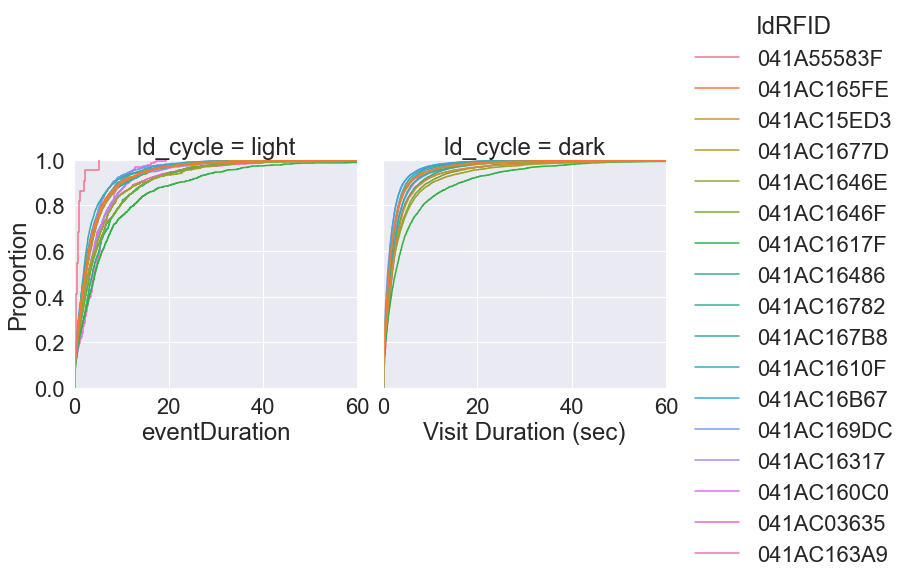

In [13]:
sns.displot(data=data_RFID, x="eventDuration", kind="ecdf", hue='IdRFID', col='ld_cycle')
plt.xlabel('Visit Duration (sec)')
plt.xlim(0, 60)
plt.show()

In [14]:
data_RFID.groupby(['unitLabel'])['IdRFID'].value_counts()

unitLabel   IdRFID    
Spyder1.01  041AC165FE    1571
            041AC15ED3    1343
            041AC1677D    1252
            041AC1646E    1146
Spyder1.02  041AC165FE    1623
            041AC1677D    1186
            041AC15ED3    1001
            041AC1646E    779 
Spyder1.03  041AC165FE    1451
            041AC15ED3    1389
            041AC1677D    1096
            041AC1646E    574 
Spyder1.04  041AC165FE    1285
            041AC1677D    971 
            041AC15ED3    601 
            041AC1646E    538 
            041A55583F    2   
Spyder1.05  041AC165FE    1621
            041AC1677D    1571
            041AC1646E    1085
            041AC15ED3    822 
            041A55583F    1   
Spyder1.06  041AC165FE    2382
            041AC1677D    2303
            041AC15ED3    1583
            041AC1646E    1279
            041A55583F    1   
Spyder1.07  041AC16486    1037
            041AC16782    1035
            041AC1646F    828 
            041AC1617F    738 
            041A

#### Map unitLabel and bottle contents

In [15]:
RFID_bottle_assignment_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/meta/bottle_assignment_RFID.xlsx'

RFID_bottle_assignment = pd.read_excel(RFID_bottle_assignment_path)
RFID_bottle_assignment = pd.DataFrame(data = RFID_bottle_assignment)
print(RFID_bottle_assignment.shape)
RFID_bottle_assignment.tail()

(19, 35)


,cohort,RFID_file,VDM_file,Spyder1.01,Spyder1.02,Spyder1.03,Spyder1.04,Spyder1.05,Spyder1.06,Spyder1.07,Spyder1.08,Spyder1.09,Spyder1.10,Spyder1.11,Spyder1.12,Spyder1.13,Spyder1.14,Spyder1.15,Spyder1.16,Spyder1.17,Spyder1.18,Spyder1.19,Spyder1.20,Spyder1.21,Spyder1.22,Spyder1.23,Spyder1.24,Spyder1.25,Spyder1.26,Spyder1.27,Spyder1.28,Spyder1.29,Spyder1.30,Spyder1.31,Spyder1.32
14,poly,Idspyder-22.09.07.csv,w_e10_f20_w_e5_f5_mfFP_220907.csv,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,poly,Idspyder-22.09.12.csv,w_e10_f20_w_e5_f5_mfFP_220912.csv,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,poly,Idspyder-22.09.19.csv,w_e10_f20_w_e5_f5_mf_220919.csv,etoh_10,fent_20,water_1,etoh_05,fent_05,water_2,etoh_10,fent_20,water_1,etoh_05,fent_05,water_2,etoh_10,fent_20,water_1,etoh_05,fent_05,water_2,etoh_10,fent_20,water_1,etoh_05,fent_05,water_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,poly,Idspyder-22.09.29.csv,w_e10_f20_w_e5_f5_mf_220929.csv,etoh_10,fent_20,water_1,etoh_05,fent_05,water_2,etoh_10,fent_20,water_1,etoh_05,fent_05,water_2,etoh_10,fent_20,water_1,etoh_05,fent_05,water_2,etoh_10,fent_20,water_1,etoh_05,fent_05,water_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,poly,Idspyder-22.10.10.csv,w_e10_f20_w_e5_f5_mf_221010.csv,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,water_1,etoh_10,fent_20,water_2,etoh_05,fent_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
file=data_RFID['RFID_file'].unique()[0]
RFID_bottle_map = RFID_bottle_assignment[RFID_bottle_assignment['RFID_file']==file].reset_index().loc[0,'Spyder1.01':'Spyder1.32'].to_dict()

data_RFID['unitLabel_drink'] = data_RFID['unitLabel'].map(RFID_bottle_map)
print(data_RFID.shape)

data_RFID.head()

(150774, 24)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld_cycle,ld_day,unitLabel_drink
0,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.457,2022-10-10 14:00:16.519046400,2022-10-10,10,14:00:16,14,0,16,2022-10-10 14:00:16.976046400,14:00:16,1,840,50416,14,840,50356,light,1,light,1,water_1
1,Idspyder-22.10.10.csv,041A55583F,Spyder1.13,0.075,2022-10-10 14:00:20.190960000,2022-10-10,10,14:00:20,14,0,20,2022-10-10 14:00:20.265960000,14:00:20,1,840,50420,14,840,50360,light,1,light,1,water_1
2,Idspyder-22.10.10.csv,041A55583F,Spyder1.14,0.458,2022-10-10 14:00:21.414988800,2022-10-10,10,14:00:21,14,0,21,2022-10-10 14:00:21.872988800,14:00:21,1,840,50421,14,840,50361,light,1,light,1,etoh_10
3,Idspyder-22.10.10.csv,041A55583F,Spyder1.15,1.030,2022-10-10 14:00:22.616985600,2022-10-10,10,14:00:22,14,0,22,2022-10-10 14:00:23.646985600,14:00:23,1,840,50422,14,840,50362,light,1,light,1,fent_20
4,Idspyder-22.10.10.csv,041A55583F,Spyder1.10,0.987,2022-10-10 14:00:25.018041600,2022-10-10,10,14:00:25,14,0,25,2022-10-10 14:00:26.005041600,14:00:26,1,840,50425,14,840,50365,light,1,light,1,water_2


In [17]:
data_RFID.groupby('unitLabel_drink')['unitLabel'].value_counts()

unitLabel_drink  unitLabel 
etoh_05          Spyder1.17    7216 
                 Spyder1.05    5100 
                 Spyder1.23    3397 
                 Spyder1.11    2490 
etoh_10          Spyder1.14    12694
                 Spyder1.20    10759
                 Spyder1.08    4628 
                 Spyder1.02    4589 
fent_05          Spyder1.18    8186 
                 Spyder1.06    7548 
                 Spyder1.12    6700 
                 Spyder1.24    6301 
fent_20          Spyder1.15    12524
                 Spyder1.21    11441
                 Spyder1.09    5406 
                 Spyder1.03    4510 
water_1          Spyder1.13    7842 
                 Spyder1.01    5312 
                 Spyder1.19    4698 
                 Spyder1.07    3639 
water_2          Spyder1.16    5082 
                 Spyder1.22    3943 
                 Spyder1.04    3397 
                 Spyder1.10    3372 
Name: unitLabel, dtype: int64

#### Add metadata and clean

In [18]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/meta/meta_data.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_RFID_final = meta_data.merge(data_RFID.reset_index(), on='IdRFID', sort=False)

print(data_RFID_final.shape)
data_RFID_final.head()

(150752, 39)


,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,RFID_file,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld_cycle,ld_day,unitLabel_drink
0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,21,Idspyder-22.10.10.csv,Spyder1.13,1.974,2022-10-10 14:02:14.201980800,2022-10-10,10,14:02:14,14,2,14,2022-10-10 14:02:16.175980800,14:02:16,1,842,50534,14,842,50474,light,1,light,1,water_1
1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,28,Idspyder-22.10.10.csv,Spyder1.04,0.801,2022-10-10 14:04:01.679001600,2022-10-10,10,14:04:01,14,4,1,2022-10-10 14:04:02.480001600,14:04:02,1,844,50641,14,844,50581,light,1,light,1,water_2
2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,29,Idspyder-22.10.10.csv,Spyder1.04,4.036,2022-10-10 14:04:04.095004800,2022-10-10,10,14:04:04,14,4,4,2022-10-10 14:04:08.131004800,14:04:08,1,844,50644,14,844,50584,light,1,light,1,water_2
3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,32,Idspyder-22.10.10.csv,Spyder1.05,0.987,2022-10-10 14:04:15.424982400,2022-10-10,10,14:04:15,14,4,15,2022-10-10 14:04:16.411982400,14:04:16,1,844,50655,14,844,50595,light,1,light,1,etoh_05
4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,42,Idspyder-22.10.10.csv,Spyder1.01,2.982,2022-10-10 14:05:04.341033600,2022-10-10,10,14:05:04,14,5,4,2022-10-10 14:05:07.323033600,14:05:07,1,845,50704,14,845,50644,light,1,light,1,water_1


In [19]:
data_RFID_final = data_RFID_final[['Round', 'Timepoint', 'Cage', 'IdRFID', 'Animal', 'Injury', 'Sex', 'Cage_N', 
                                   'unitLabel_drink', 'unitLabel', 'eventDuration',
                                   'ld_cycle', 'ld_day', 'day', 'RFID_hour', 'RFID_min', 'RFID_second',
                                   'RFID_datetime_start', 'RFID_datetime_end', 'RFID_time_start', 'RFID_time_end', 
                                   'RFID_min_count', 'RFID_sec_count', 
                                   'RFID_hour_count_running', 'RFID_min_count_running', 'RFID_sec_count_running', 
                                   'RFID_file', 'weight_pre', 'weight_post', 'weight_diff', 'notes',]]

print(data_RFID_final.shape)
data_RFID_final.head()

(150752, 31)


,Round,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,weight_pre,weight_post,weight_diff,notes
0,poly,na,1,041AC165FE,2137.0,na,male,4,water_1,Spyder1.13,1.974,light,1,1,14,2,14,2022-10-10 14:02:14.201980800,2022-10-10 14:02:16.175980800,14:02:14,14:02:16,842,50534,14,842,50474,Idspyder-22.10.10.csv,29.7,NaN,NaN,NaN
1,poly,na,1,041AC165FE,2137.0,na,male,4,water_2,Spyder1.04,0.801,light,1,1,14,4,1,2022-10-10 14:04:01.679001600,2022-10-10 14:04:02.480001600,14:04:01,14:04:02,844,50641,14,844,50581,Idspyder-22.10.10.csv,29.7,NaN,NaN,NaN
2,poly,na,1,041AC165FE,2137.0,na,male,4,water_2,Spyder1.04,4.036,light,1,1,14,4,4,2022-10-10 14:04:04.095004800,2022-10-10 14:04:08.131004800,14:04:04,14:04:08,844,50644,14,844,50584,Idspyder-22.10.10.csv,29.7,NaN,NaN,NaN
3,poly,na,1,041AC165FE,2137.0,na,male,4,etoh_05,Spyder1.05,0.987,light,1,1,14,4,15,2022-10-10 14:04:15.424982400,2022-10-10 14:04:16.411982400,14:04:15,14:04:16,844,50655,14,844,50595,Idspyder-22.10.10.csv,29.7,NaN,NaN,NaN
4,poly,na,1,041AC165FE,2137.0,na,male,4,water_1,Spyder1.01,2.982,light,1,1,14,5,4,2022-10-10 14:05:04.341033600,2022-10-10 14:05:07.323033600,14:05:04,14:05:07,845,50704,14,845,50644,Idspyder-22.10.10.csv,29.7,NaN,NaN,NaN


In [20]:
data_RFID_final.groupby('Sex')['Cage'].value_counts()

Sex     Cage
female  3       53515
        4       40548
male    1       30456
        2       26233
Name: Cage, dtype: int64

In [21]:
data_RFID_final.to_csv('RFID_221010.csv')

#### Viz

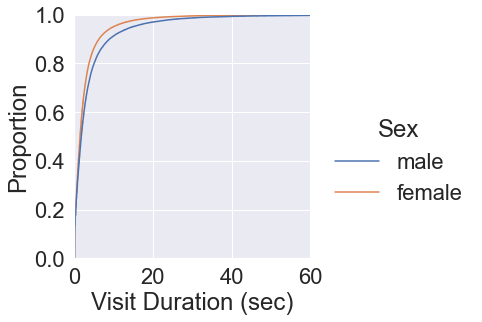

In [22]:
data_int = data_RFID_final
sns.displot(data=data_int, x="eventDuration", kind="ecdf", hue='Sex')
plt.xlabel('Visit Duration (sec)')
plt.xlim(0, 60)
plt.show()

<Figure size 720x360 with 0 Axes>

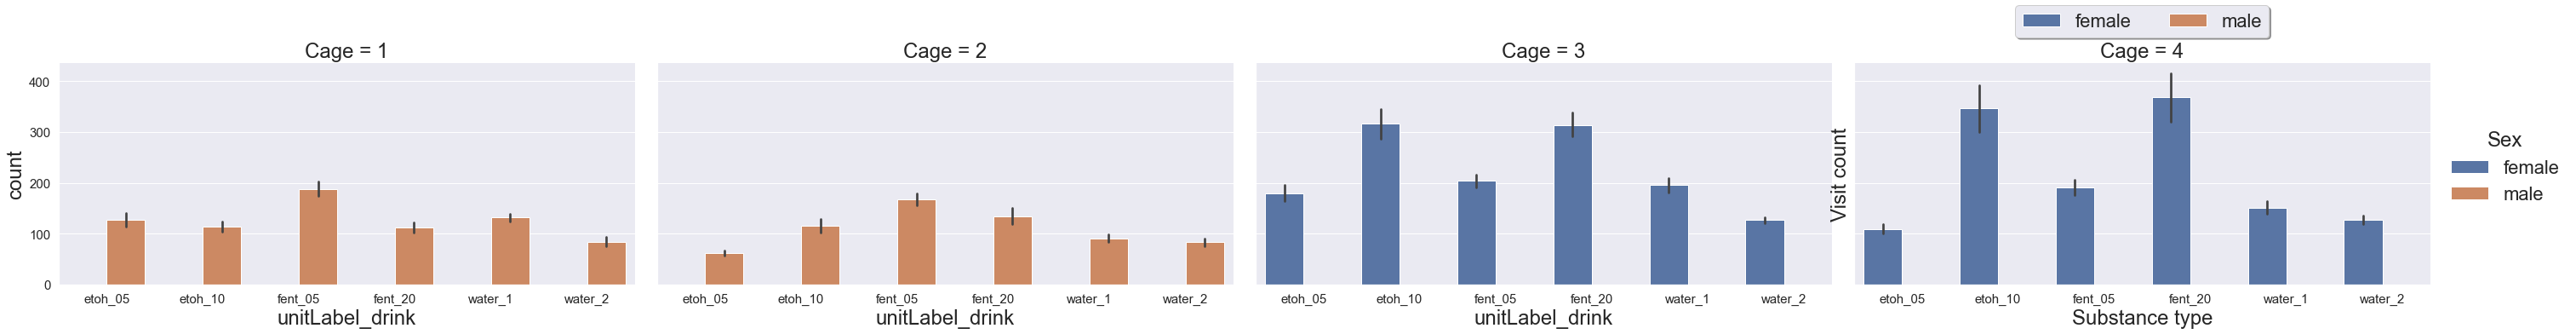

In [23]:
data_int = data_RFID_final

data_int = data_int.groupby(['Sex', 'IdRFID', 'Cage', 'day', 'unitLabel_drink'])['eventDuration'].count().reset_index(name='count')

plt.figure(figsize=(10,5))
params = {'axes.labelsize': 30,
          'axes.titlesize': 30}
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
sns.catplot(data=data_int, x="unitLabel_drink", y='count', hue="Sex", kind='bar', height=5, aspect=2, ci=68, col='Cage')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), 
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Substance type')
plt.ylabel('Visit count')
plt.show()

### VDM data

#### Get paths for files to process

In [24]:
#create list of dir paths
VDM_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly'
    
VDM_file_names = os.listdir(VDM_path)

VDM_data_dir_paths = []

for file in VDM_file_names:
    int_path = VDM_path + '/' + file
    VDM_data_dir_paths.append(int_path)
    
VDM_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/.DS_Store',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/f20_w_e10_f5_w_e5_mf_220504.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/w_e10_f20_w_e5_f5_mf_220929.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/f20_w_e10_f5_w_e5_mf_220428.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/w_e10_f20_w_e5_f5_mf_221010.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/w_e10_f20_w_e5_f5_mf_220708.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/f20_w_e10_f5_w_e5_mf_220420.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/w_e10_f20_w_e5_f5_mf_220919.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/w_e10_f20_w_e5_f5_f_220727.csv',
 '/Users/abbieschindler/Documents

#### Clean df and remove starting meta data

In [26]:
data_VDM_int = pd.read_table(VDM_data_dir_paths[4], sep=';')
data_VDM_int = pd.DataFrame(data = data_VDM_int)
data_VDM_int.head(50)

,Columbus Instruments Device Interface Version 1.5
0,"Started On:,10/10/22 13:59:19"
1,[Experiment Setup Info]
2,"Program Path:,C:\Users\PhenoUser\Desktop\CI Multi-Device Interface"
3,"Data Path:,C:\Users\PhenoUser\Desktop\CI Multi-Device Interface\Data"
4,"Experiment File Name:,C:\Users\PhenoUser\Documents\VDM\final_setup\w_e10_f20_w_e5_f5_mf_221010.csv"
5,"Session Interval:,00:00:01"
6,"Experiment Duration:,0"
7,"Staggered Start Enable:,False"
8,[Channel Setup Info]
9,"Cage 1,Cage1"


In [27]:
row_drop = 22
data_VDM = pd.DataFrame()

for path in VDM_data_dir_paths[4:5]:
    print(path)
    
    if path.split('/')[-1] == '.DS_Store':
        continue
        
    #create data table
    data_VDM_int = pd.read_table(path, sep=';')
    data_VDM_int = pd.DataFrame(data = data_VDM_int)
    data_VDM_int = data_VDM_int.iloc[row_drop: , :]['Columbus Instruments Device Interface Version 1.5'].str.split(',', expand=True)
    data_VDM_int.columns = data_VDM_int.loc[row_drop].values
    data_VDM_int = data_VDM_int.drop(row_drop)
    
    data_VDM_int['VDM_file'] = path.split('/')[-1]

    if data_VDM.empty:
        data_VDM = data_VDM_int
    else:
        data_VDM = pd.concat([data_VDM, data_VDM_int], axis=0)
        
    print(data_VDM.shape,'\n')

print(data_VDM.shape)
data_VDM.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/VDM/poly/w_e10_f20_w_e5_f5_mf_221010.csv
(3798555, 13) 

(3798555, 13)


,Int,Cage,Time,Drinking (ml),Drinking Accum (ml),Drinking (ml),Drinking Accum (ml),Drinking (ml),Drinking Accum (ml),Drinking (ml),Drinking Accum (ml),,VDM_file
23,0,1,10/10/22 13:59:23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,w_e10_f20_w_e5_f5_mf_221010.csv
24,0,2,10/10/22 13:59:23,0.000,0.000,0.000,0.000,,,,,,w_e10_f20_w_e5_f5_mf_221010.csv
25,0,3,10/10/22 13:59:23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,w_e10_f20_w_e5_f5_mf_221010.csv
26,0,4,10/10/22 13:59:23,0.000,0.000,0.000,0.000,,,,,,w_e10_f20_w_e5_f5_mf_221010.csv
27,0,5,10/10/22 13:59:23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,w_e10_f20_w_e5_f5_mf_221010.csv


In [28]:
data_VDM.columns = ['Int', 'Cage_VDM', 'VDM_Time', 
                    'drink_1', 'drink_1_accum',
                    'drink_2', 'drink_2_accum',
                    'drink_3', 'drink_3_accum',
                    'drink_4', 'drink_4_accum',
                    'blank', 'VDM_file']

data_VDM = data_VDM[['VDM_file', 'Cage_VDM', 'VDM_Time', 
                    'drink_1', 
                    'drink_2', 
                    'drink_3', 
                    'drink_4', 
                    ]]

data_VDM.tail()

,VDM_file,Cage_VDM,VDM_Time,drink_1,drink_2,drink_3,drink_4
3798573,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/19/22 08:18:25,0.000,0.000,,
3798574,w_e10_f20_w_e5_f5_mf_221010.csv,5,10/19/22 08:18:25,0.000,0.000,0.000,0.000
3798575,w_e10_f20_w_e5_f5_mf_221010.csv,6,10/19/22 08:18:25,0.000,0.000,,
3798576,w_e10_f20_w_e5_f5_mf_221010.csv,7,10/19/22 08:18:25,0.000,0.000,0.000,0.000
3798577,w_e10_f20_w_e5_f5_mf_221010.csv,8,10/19/22 08:18:25,0.000,0.000,,


#### Make into tidy df

In [29]:
#melt dataframe (new column of parameters)

meta_params = ['VDM_file', 'Cage_VDM', 'VDM_Time']
intake_params = ['drink_1', 'drink_2', 'drink_3', 'drink_4']

data_VDM_tidy = pd.melt(data_VDM, id_vars=meta_params, value_vars=intake_params)

data_VDM_tidy = data_VDM_tidy.replace({'':0.000})

data_VDM_tidy['value'] = data_VDM_tidy['value'].astype('float')

print(data_VDM_tidy.shape)
data_VDM_tidy.head()

(15194220, 5)


,VDM_file,Cage_VDM,VDM_Time,variable,value
0,w_e10_f20_w_e5_f5_mf_221010.csv,1,10/10/22 13:59:23,drink_1,0.0
1,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 13:59:23,drink_1,0.0
2,w_e10_f20_w_e5_f5_mf_221010.csv,3,10/10/22 13:59:23,drink_1,0.0
3,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/10/22 13:59:23,drink_1,0.0
4,w_e10_f20_w_e5_f5_mf_221010.csv,5,10/10/22 13:59:23,drink_1,0.0


In [30]:
data_VDM_tidy['value'].unique()

array([0.   , 0.021, 0.042, 0.028, 0.031, 0.056, 0.063, 0.062, 0.026,
       0.027, 0.054, 0.052, 0.078, 0.135, 0.081, 0.162, 0.108, 0.189,
       0.216, 0.243, 0.104, 0.156, 0.032, 0.064, 0.084, 0.105, 0.126,
       0.13 ])

#### Drop times with no intake data

In [31]:
data_VDM_tidy_intake = data_VDM_tidy[data_VDM_tidy['value'] > 0.000]
print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(26291, 5)


,VDM_file,Cage_VDM,VDM_Time,variable,value
18233,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 14:59:50,drink_1,0.021
33795,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/10/22 15:51:27,drink_1,0.021
41753,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021
41769,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021
41785,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021


#### Clean up datetime

In [32]:
#clean up and create datetime columns
data_VDM_tidy_intake['VDM_datetime'] = pd.to_datetime(data_VDM_tidy_intake['VDM_Time'])
data_VDM_tidy_intake['VDM_timestamp'] = [x.timestamp() for x in data_VDM_tidy_intake['VDM_datetime']]

data_VDM_tidy_intake['VDM_date'] = data_VDM_tidy_intake['VDM_datetime'].dt.date
data_VDM_tidy_intake['VDM_day'] = data_VDM_tidy_intake['VDM_datetime'].dt.day
data_VDM_tidy_intake['VDM_time'] = data_VDM_tidy_intake['VDM_datetime'].dt.strftime("%H:%M:%S")
data_VDM_tidy_intake['VDM_hour'] = data_VDM_tidy_intake['VDM_datetime'].dt.hour
data_VDM_tidy_intake['VDM_min'] = data_VDM_tidy_intake['VDM_datetime'].dt.minute
data_VDM_tidy_intake['VDM_second'] = data_VDM_tidy_intake['VDM_datetime'].dt.second

print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(26291, 13)


,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second
18233,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 14:59:50,drink_1,0.021,2022-10-10 14:59:50,1.665414e+09,2022-10-10,10,14:59:50,14,59,50
33795,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/10/22 15:51:27,drink_1,0.021,2022-10-10 15:51:27,1.665417e+09,2022-10-10,10,15:51:27,15,51,27
41753,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51
41769,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54
41785,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57


In [33]:
data_VDM_tidy_intake['VDM_day'].value_counts()

13    7725
12    5406
17    2999
18    2254
11    1955
14    1843
15    1205
16    993 
19    980 
10    931 
Name: VDM_day, dtype: int64

#### Light/dark mapping

In [34]:
def assign_ld(time):
    if (time >= 6) & (time < 18):
        return 'light'
    if (time >= 0) & (time < 6):
        return 'dark_am'
    if (time >= 18):
        return 'dark_pm'
    
data_VDM_tidy_intake['ld_seg'] = data_VDM_tidy_intake['VDM_hour'].apply(assign_ld)

data_VDM_tidy_intake.head()

,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg
18233,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 14:59:50,drink_1,0.021,2022-10-10 14:59:50,1.665414e+09,2022-10-10,10,14:59:50,14,59,50,light
33795,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/10/22 15:51:27,drink_1,0.021,2022-10-10 15:51:27,1.665417e+09,2022-10-10,10,15:51:27,15,51,27,light
41753,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light
41769,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light
41785,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light


#### Map bottle contents

In [35]:
data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='1') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_H20_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='1') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_EtOH10'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='1') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_Fent20'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='1') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_H20_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='2') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_EtOH05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='2') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_Fent05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='2') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_drip_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='2') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_drip_2'


data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='3') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_H20_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='3') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_EtOH10'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='3') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_Fent20'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='3') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_H20_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='4') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_EtOH05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='4') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_Fent05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='4') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_drip_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='4') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_drip_2'



data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='5') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_H20_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='5') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_EtOH10'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='5') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_Fent20'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='5') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_H20_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='6') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_EtOH05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='6') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_Fent05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='6') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_drip_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='6') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_drip_2'


data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='7') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_H20_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='7') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_EtOH10'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='7') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_Fent20'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='7') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_H20_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='8') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_EtOH05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='8') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_Fent05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='8') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_drip_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='8') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_drip_2'


print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(26291, 15)


,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink
18233,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 14:59:50,drink_1,0.021,2022-10-10 14:59:50,1.665414e+09,2022-10-10,10,14:59:50,14,59,50,light,VDM_EtOH05
33795,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/10/22 15:51:27,drink_1,0.021,2022-10-10 15:51:27,1.665417e+09,2022-10-10,10,15:51:27,15,51,27,light,VDM_EtOH05
41753,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05
41769,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05
41785,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05


In [ ]:
data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='1') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_Fent20'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='1') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_H20_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='1') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_EtOH10'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='1') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_Fent05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='2') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_H20_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='2') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_EtOH05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='2') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_drip_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='2') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_drip_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='3') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_Fent20'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='3') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_H20_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='3') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_EtOH10'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='3') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_Fent05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='4') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_H20_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='4') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_EtOH05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='4') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_drip_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='4') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_drip_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='5') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_Fent20'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='5') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_H20_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='5') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_EtOH10'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='5') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_Fent05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='6') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_H20_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='6') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_EtOH05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='6') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_drip_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='6') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_drip_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='7') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_Fent20'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='7') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_H20_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='7') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_EtOH10'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='7') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_Fent05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='8') & (data_VDM_tidy_intake['variable']=='drink_1'), 
                         'VDM_drink'] = 'VDM_H20_2'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='8') & (data_VDM_tidy_intake['variable']=='drink_2'), 
                         'VDM_drink'] = 'VDM_EtOH05'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='8') & (data_VDM_tidy_intake['variable']=='drink_3'), 
                         'VDM_drink'] = 'VDM_drip_1'

data_VDM_tidy_intake.loc[(data_VDM_tidy_intake['Cage_VDM']=='8') & (data_VDM_tidy_intake['variable']=='drink_4'), 
                         'VDM_drink'] = 'VDM_drip_2'

print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

In [36]:
def assign_cage(cage):
    if cage == '1':
        return 1
    if cage == '2':
        return 1
    if cage == '3':
        return 2
    if cage == '4':
        return 2
    if cage == '5':
        return 3
    if cage == '6':
        return 3
    if cage == '7':
        return 4
    if cage == '8':
        return 4
    
data_VDM_tidy_intake['Cage_VDM_update'] = data_VDM_tidy_intake['Cage_VDM'].apply(assign_cage)

data_VDM_tidy_intake.head()

,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update
18233,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 14:59:50,drink_1,0.021,2022-10-10 14:59:50,1.665414e+09,2022-10-10,10,14:59:50,14,59,50,light,VDM_EtOH05,1
33795,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/10/22 15:51:27,drink_1,0.021,2022-10-10 15:51:27,1.665417e+09,2022-10-10,10,15:51:27,15,51,27,light,VDM_EtOH05,2
41753,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1
41769,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1
41785,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1


#### Viz

No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

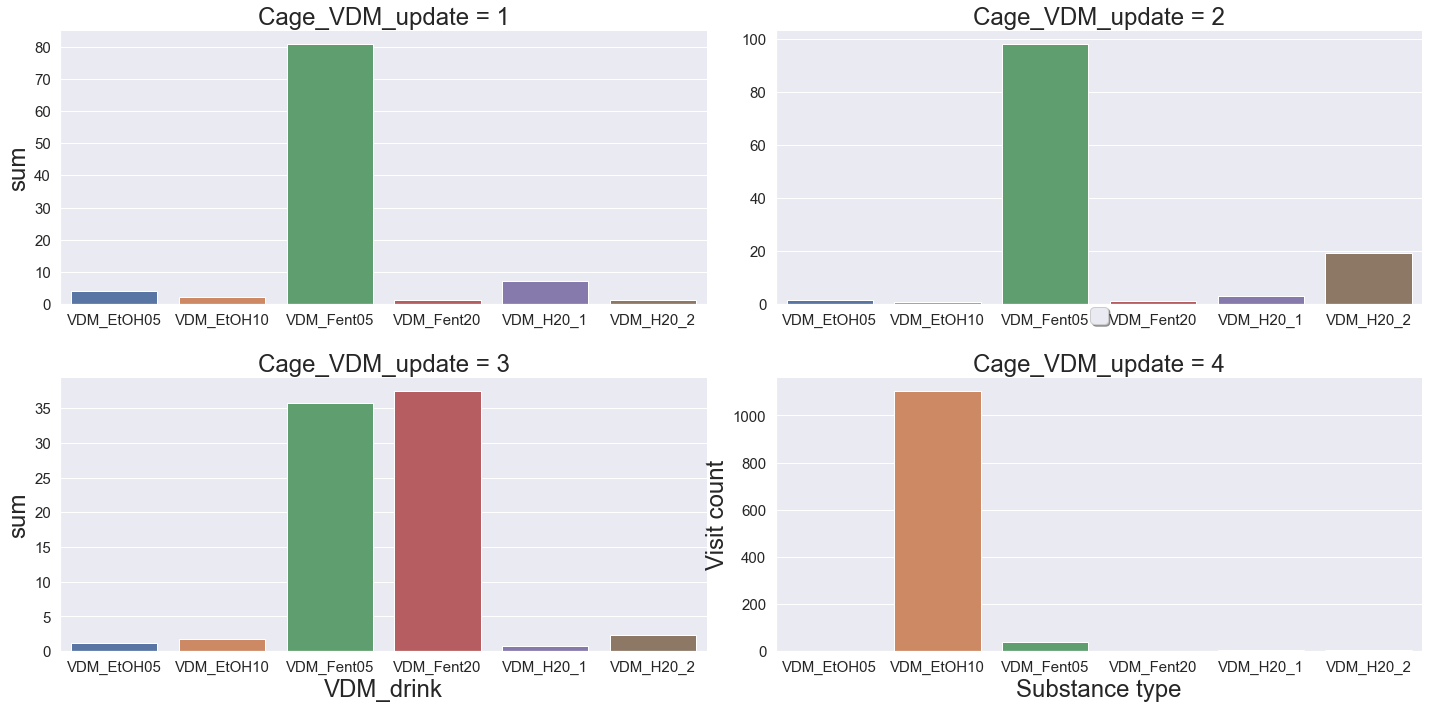

In [37]:
data_int = data_VDM_tidy_intake.groupby(['Cage_VDM_update', 'VDM_drink'])['value'].sum().reset_index(name='sum')

plt.figure(figsize=(10,5))
params = {'axes.labelsize': 30,
          'axes.titlesize': 30}
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
sns.catplot(data=data_int, x="VDM_drink", y='sum', kind='bar', height=5, aspect=2, 
            col='Cage_VDM_update', col_wrap=2, sharey=False, sharex=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Substance type')
plt.ylabel('Visit count')
plt.show()

### Filter RFID data by VDM times

In [38]:
data_VDM_tidy_intake = data_VDM_tidy_intake.sort_values(['VDM_drink', 'VDM_datetime']).reset_index(drop=True)
drink_drop = ['VDM_drip_1', 'VDM_drip_2']
data_VDM_tidy_intake = data_VDM_tidy_intake[~data_VDM_tidy_intake['VDM_drink'].isin(drink_drop)]
print(data_VDM_tidy_intake.groupby('Cage_VDM_update')['VDM_drink'].value_counts())
print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

Cage_VDM_update  VDM_drink 
1                VDM_Fent05    3785 
                 VDM_H20_1     260  
                 VDM_EtOH05    185  
                 VDM_EtOH10    95   
                 VDM_H20_2     68   
                 VDM_Fent20    66   
2                VDM_Fent05    4403 
                 VDM_H20_2     824  
                 VDM_H20_1     141  
                 VDM_EtOH05    65   
                 VDM_Fent20    50   
                 VDM_EtOH10    36   
3                VDM_Fent20    1627 
                 VDM_Fent05    1386 
                 VDM_H20_2     111  
                 VDM_EtOH10    53   
                 VDM_EtOH05    47   
                 VDM_H20_1     35   
4                VDM_EtOH10    11405
                 VDM_Fent05    1376 
                 VDM_H20_1     134  
                 VDM_H20_2     76   
                 VDM_EtOH05    46   
                 VDM_Fent20    17   
Name: VDM_drink, dtype: int64
(26291, 16)


,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update
0,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 14:59:50,drink_1,0.021,2022-10-10 14:59:50,1.665414e+09,2022-10-10,10,14:59:50,14,59,50,light,VDM_EtOH05,1
1,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/10/22 15:51:27,drink_1,0.021,2022-10-10 15:51:27,1.665417e+09,2022-10-10,10,15:51:27,15,51,27,light,VDM_EtOH05,2
2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1
3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1
4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1


In [39]:
data_RFID_final= data_RFID_final.sort_values(['unitLabel_drink', 'RFID_datetime_start']).reset_index(drop=True)
print(data_RFID_final['unitLabel_drink'].value_counts())
data_RFID_final.head()

fent_20    33878
etoh_10    32667
fent_05    28732
water_1    21486
etoh_05    18200
water_2    15789
Name: unitLabel_drink, dtype: int64


,Round,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,weight_pre,weight_post,weight_diff,notes
0,poly,na,1,041AC165FE,2137.0,na,male,4,etoh_05,Spyder1.05,0.987,light,1,1,14,4,15,2022-10-10 14:04:15.424982400,2022-10-10 14:04:16.411982400,14:04:15,14:04:16,844,50655,14,844,50595,Idspyder-22.10.10.csv,29.7,NaN,NaN,NaN
1,poly,na,1,041AC15ED3,2138.0,na,male,4,etoh_05,Spyder1.05,5.699,light,1,1,14,5,4,2022-10-10 14:05:04.949030400,2022-10-10 14:05:10.648030400,14:05:04,14:05:10,845,50704,14,845,50644,Idspyder-22.10.10.csv,28.4,NaN,NaN,NaN
2,poly,na,1,041AC1677D,2139.0,na,male,4,etoh_05,Spyder1.05,5.007,light,1,1,14,7,26,2022-10-10 14:07:26.058979200,2022-10-10 14:07:31.065979200,14:07:26,14:07:31,847,50846,14,847,50786,Idspyder-22.10.10.csv,27.5,NaN,NaN,NaN
3,poly,na,1,041AC1646E,21399.0,na,male,4,etoh_05,Spyder1.05,10.001,light,1,1,14,8,43,2022-10-10 14:08:43.278028800,2022-10-10 14:08:53.279028800,14:08:43,14:08:53,848,50923,14,848,50863,Idspyder-22.10.10.csv,31.0,NaN,NaN,NaN
4,poly,na,1,041AC165FE,2137.0,na,male,4,etoh_05,Spyder1.05,3.346,light,1,1,14,8,56,2022-10-10 14:08:56.193964800,2022-10-10 14:08:59.539964800,14:08:56,14:08:59,848,50936,14,848,50876,Idspyder-22.10.10.csv,29.7,NaN,NaN,NaN


#### Match cage, unitLabel, and datetime

In [40]:
data_comb = data_VDM_tidy_intake

flavor_mapping = {'VDM_Fent05': 'fent_05',
                  'VDM_Fent20': 'fent_20',
                  'VDM_EtOH05': 'etoh_05',
                  'VDM_EtOH10': 'etoh_10',
                  'VDM_H20_1': 'water_1',
                  'VDM_H20_2': 'water_2'}

RFID_eventDuration = []
RFID_assign_id_pre = []
RFID_assign_var_pre = []
RFID_datetime_start_pre = []
RFID_datetime_end_pre = []

ld_cycle = []
ld_day = []

for index, row in data_VDM_tidy_intake.iterrows():
    if index%1000 == 0:
        print(index)
        
    #find RFID signal start time closest to VDM time before
    try:
        int_assign = data_RFID_final[(data_RFID_final['Cage'] == row['Cage_VDM_update']) & #match cage
                               (data_RFID_final['unitLabel_drink'] == flavor_mapping[row['VDM_drink']]) & #match tube
                               (data_RFID_final['RFID_datetime_start'] <= row['VDM_datetime']) #find closest datetime
                              ].sort_values(['RFID_datetime_start']).iloc[-1]

        RFID_eventDuration.append(int_assign['eventDuration'])
        RFID_assign_id_pre.append(int_assign['IdRFID'])
        RFID_assign_var_pre.append(int_assign['unitLabel_drink'])
        RFID_datetime_start_pre.append(int_assign['RFID_datetime_start'])
        RFID_datetime_end_pre.append(int_assign['RFID_datetime_end'])

        ld_cycle.append(int_assign['ld_cycle'])
        ld_day.append(int_assign['ld_day'])
        
    except:
        print(index, 'pre', row['Cage_VDM_update'])
        RFID_eventDuration.append(np.nan)
        RFID_assign_id_pre.append(np.nan)
        RFID_assign_var_pre.append(np.nan)
        RFID_datetime_start_pre.append(np.nan)
        RFID_datetime_end_pre.append(np.nan)

        ld_cycle.append(np.nan)
        ld_day.append(np.nan)
        
data_comb['RFID_eventDuration'] = RFID_eventDuration
data_comb['RFID_assign_id_pre'] = RFID_assign_id_pre
data_comb['RFID_assign_var_pre'] = RFID_assign_var_pre
data_comb['RFID_datetime_start_pre'] = RFID_datetime_start_pre
data_comb['RFID_datetime_end_pre'] = RFID_datetime_end_pre

data_comb['ld_cycle'] = ld_cycle
data_comb['ld_day'] = ld_day


print(data_comb.shape)
data_comb.head()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
(26291, 23)


,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day
0,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 14:59:50,drink_1,0.021,2022-10-10 14:59:50,1.665414e+09,2022-10-10,10,14:59:50,14,59,50,light,VDM_EtOH05,1,8.420,041AC1677D,etoh_05,2022-10-10 14:59:43.568016000,2022-10-10 14:59:51.988016000,light,1
1,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/10/22 15:51:27,drink_1,0.021,2022-10-10 15:51:27,1.665417e+09,2022-10-10,10,15:51:27,15,51,27,light,VDM_EtOH05,2,18.022,041AC16486,etoh_05,2022-10-10 15:51:19.438041600,2022-10-10 15:51:37.460041600,light,1
2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1
3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1
4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1


In [41]:
data_comb.isna().sum()

VDM_file                   0
Cage_VDM                   0
VDM_Time                   0
variable                   0
value                      0
VDM_datetime               0
VDM_timestamp              0
VDM_date                   0
VDM_day                    0
VDM_time                   0
VDM_hour                   0
VDM_min                    0
VDM_second                 0
ld_seg                     0
VDM_drink                  0
Cage_VDM_update            0
RFID_eventDuration         0
RFID_assign_id_pre         0
RFID_assign_var_pre        0
RFID_datetime_start_pre    0
RFID_datetime_end_pre      0
ld_cycle                   0
ld_day                     0
dtype: int64

#### Copmuter RFID/VDM time difference

In [42]:
def time_within(RFID_start, RFID_stop, VDM_time):
    
    if (VDM_time >= RFID_start) & (VDM_time <= RFID_stop):
        return 0
    
    elif (VDM_time >= RFID_start) & (VDM_time >= RFID_stop):
        time_within = VDM_time - RFID_stop
        time_within = time_within.total_seconds()
        return time_within
    
data_comb['VDM_RFID_timediff'] = data_comb.apply(lambda row: time_within(row['RFID_datetime_start_pre'], 
                                                                   row['RFID_datetime_end_pre'],
                                                                   row['VDM_datetime']), axis=1)

data_comb['VDM_RFID_timediff_bool'] = ['same' if x==0 else 'diff' for x in data_comb['VDM_RFID_timediff']]

data_comb.head()

,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool
0,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 14:59:50,drink_1,0.021,2022-10-10 14:59:50,1.665414e+09,2022-10-10,10,14:59:50,14,59,50,light,VDM_EtOH05,1,8.420,041AC1677D,etoh_05,2022-10-10 14:59:43.568016000,2022-10-10 14:59:51.988016000,light,1,0.0,same
1,w_e10_f20_w_e5_f5_mf_221010.csv,4,10/10/22 15:51:27,drink_1,0.021,2022-10-10 15:51:27,1.665417e+09,2022-10-10,10,15:51:27,15,51,27,light,VDM_EtOH05,2,18.022,041AC16486,etoh_05,2022-10-10 15:51:19.438041600,2022-10-10 15:51:37.460041600,light,1,0.0,same
2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same
3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same
4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same


In [43]:
data_comb.groupby(['Cage_VDM_update', 'VDM_drink', ])['VDM_RFID_timediff_bool'].value_counts()

Cage_VDM_update  VDM_drink   VDM_RFID_timediff_bool
1                VDM_EtOH05  same                      159 
                             diff                      26  
                 VDM_EtOH10  same                      64  
                             diff                      31  
                 VDM_Fent05  same                      3527
                             diff                      258 
                 VDM_Fent20  same                      38  
                             diff                      28  
                 VDM_H20_1   same                      194 
                             diff                      66  
                 VDM_H20_2   same                      41  
                             diff                      27  
2                VDM_EtOH05  same                      41  
                             diff                      24  
                 VDM_EtOH10  diff                      28  
                             same               

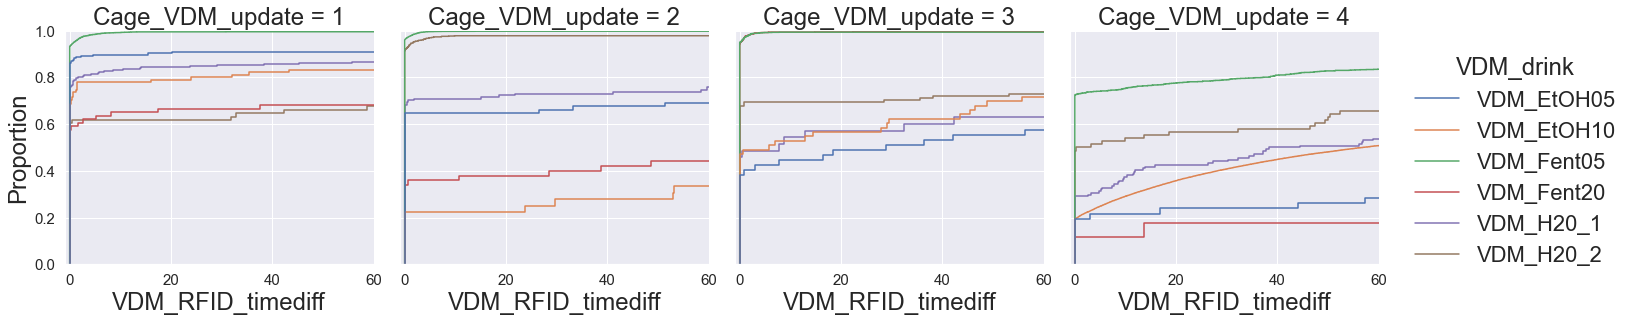

In [44]:
sns.displot(data=data_comb, x="VDM_RFID_timediff", kind="ecdf", hue='VDM_drink', col='Cage_VDM_update')

plt.xlim(-1, 60)
plt.show()

#### Add metadata

In [45]:
data_comb = meta_data.merge(data_comb.reset_index(), left_on='IdRFID', right_on='RFID_assign_id_pre', sort=False)

print(data_comb.shape)
data_comb.head()

(26291, 41)


,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool
0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same
1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same
2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same
3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,5,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:59,drink_1,0.021,2022-10-10 16:17:59,1.665419e+09,2022-10-10,10,16:17:59,16,17,59,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same
4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,15,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 17:28:38,drink_1,0.021,2022-10-10 17:28:38,1.665423e+09,2022-10-10,10,17:28:38,17,28,38,light,VDM_EtOH05,1,19.446,041AC165FE,etoh_05,2022-10-10 17:28:30.700963200,2022-10-10 17:28:50.146963200,light,1,0.0,same


#### Add day, hour, and min counts

In [46]:
#column of running day count
dat_map = dict(zip(data_comb['VDM_date'].sort_values().unique(), np.arange(1,len(data_comb['VDM_date'].unique())+1)))
data_comb['day_count'] = data_comb['VDM_date'].map(dat_map)

#column of running min and second count within each day
data_comb['min_count'] = (data_comb['VDM_hour']*60) + data_comb['VDM_min'] 
data_comb['sec_count'] = (data_comb['min_count']*60) + data_comb['VDM_second'] 

#column of running hour and minute count across all days
data_comb['hour_count_running'] = (data_comb['day_count']*24) + data_comb['VDM_hour'] - 24
data_comb['min_count_running'] = (data_comb['hour_count_running']*60) + data_comb['VDM_min'] 
data_comb['sec_count_running'] = (data_comb['min_count_running']*60) + data_comb['VDM_second'] - 60

#ld
#data_comb['LD'] = [x.split('_')[0] for x in data_comb['ld']]

print(data_comb.shape)
data_comb.head()

(26291, 47)


,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running
0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58671,16,977,58611
1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58674,16,977,58614
2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58677,16,977,58617
3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,5,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:59,drink_1,0.021,2022-10-10 16:17:59,1.665419e+09,2022-10-10,10,16:17:59,16,17,59,light,VDM_EtOH05,1,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58679,16,977,58619
4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,15,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 17:28:38,drink_1,0.021,2022-10-10 17:28:38,1.665423e+09,2022-10-10,10,17:28:38,17,28,38,light,VDM_EtOH05,1,19.446,041AC165FE,etoh_05,2022-10-10 17:28:30.700963200,2022-10-10 17:28:50.146963200,light,1,0.0,same,1,1048,62918,17,1048,62858


In [47]:
data_comb['VDM_drink'] = data_comb['VDM_drink'].replace({'VDM_H20_1':'VDM_water'})
data_comb['VDM_drink'] = data_comb['VDM_drink'].replace({'VDM_H20_2':'VDM_water'})

In [48]:
data_comb['substance'] = [x.split('_')[-1] for x in data_comb['VDM_drink']]

In [49]:
data_comb.to_csv('poly_221010.csv')

No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

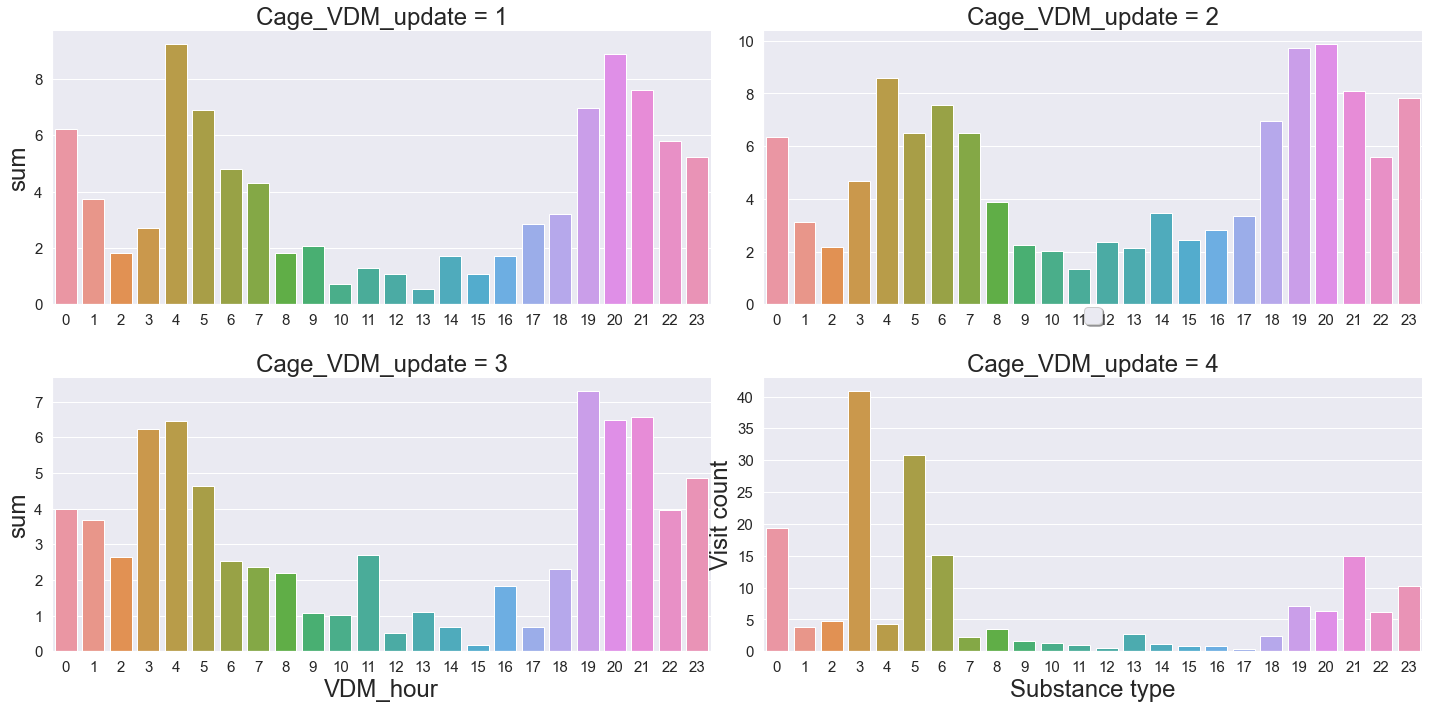

In [50]:
data_int = data_VDM_tidy_intake[data_VDM_tidy_intake['VDM_RFID_timediff']<3].groupby(['Cage_VDM_update', 'VDM_hour'])['value'].sum().reset_index(name='sum')

plt.figure(figsize=(10,5))
params = {'axes.labelsize': 30,
          'axes.titlesize': 30}
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
sns.catplot(data=data_int, x="VDM_hour", y='sum', kind='bar', height=5, aspect=2, 
            col='Cage_VDM_update', col_wrap=2, sharey=False, sharex=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Substance type')
plt.ylabel('Visit count')
plt.show()